In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("usecase_1_.csv")

In [4]:
sample_data = ("sample_data.csv")

In [5]:
df.iloc[:10].to_csv("claude_data.csv", index=False)

In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'NCT Number', 'Study Title', 'Study URL',
       'Acronym', 'Study Status', 'Brief Summary', 'Study Results',
       'Conditions', 'Interventions', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'Other Outcome Measures', 'Sponsor',
       'Collaborators', 'Sex', 'Age', 'Phases', 'Enrollment', 'Funder Type',
       'Study Type', 'Study Design', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents'],
      dtype='object')

In [7]:
# correlationMatrix = df.corr(numeric_only=True)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# fig, ax = plt.subplots(figsize=(4, 8))
# sns.heatmap(correlationMatrix,cmap='coolwarm', annot=True, vmax=0.25, vmin=-0.25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117980 entries, 0 to 117979
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0.1                117980 non-null  int64  
 1   Unnamed: 0                  117980 non-null  int64  
 2   NCT Number                  117980 non-null  object 
 3   Study Title                 117980 non-null  object 
 4   Study URL                   117980 non-null  object 
 5   Acronym                     24116 non-null   object 
 6   Study Status                117980 non-null  object 
 7   Brief Summary               117980 non-null  object 
 8   Study Results               117980 non-null  object 
 9   Conditions                  117950 non-null  object 
 10  Interventions               112324 non-null  object 
 11  Primary Outcome Measures    114903 non-null  object 
 12  Secondary Outcome Measures  93200 non-null   object 
 13  Other Outcome 

In [11]:
df.isna().sum()

Unnamed: 0.1                       0
Unnamed: 0                         0
NCT Number                         0
Study Title                        0
Study URL                          0
Acronym                        93864
Study Status                       0
Brief Summary                      0
Study Results                      0
Conditions                        30
Interventions                   5656
Primary Outcome Measures        3077
Secondary Outcome Measures     24780
Other Outcome Measures        110056
Sponsor                            0
Collaborators                  96614
Sex                              142
Age                                0
Phases                         34885
Enrollment                      1833
Funder Type                        0
Study Type                         0
Study Design                     652
Other IDs                          3
Start Date                      1739
Primary Completion Date         5994
Completion Date                 5326
F

Unnamed: 0.1                   0.000000
Unnamed: 0                     0.000000
NCT Number                     0.000000
Study Title                    0.000000
Study URL                      0.000000
Acronym                       79.559247
Study Status                   0.000000
Brief Summary                  0.000000
Study Results                  0.000000
Conditions                     0.025428
Interventions                  4.794033
Primary Outcome Measures       2.608069
Secondary Outcome Measures    21.003560
Other Outcome Measures        93.283607
Sponsor                        0.000000
Collaborators                 81.890151
Sex                            0.120359
Age                            0.000000
Phases                        29.568571
Enrollment                     1.553653
Funder Type                    0.000000
Study Type                     0.000000
Study Design                   0.552636
Other IDs                      0.002543
Start Date                     1.473979


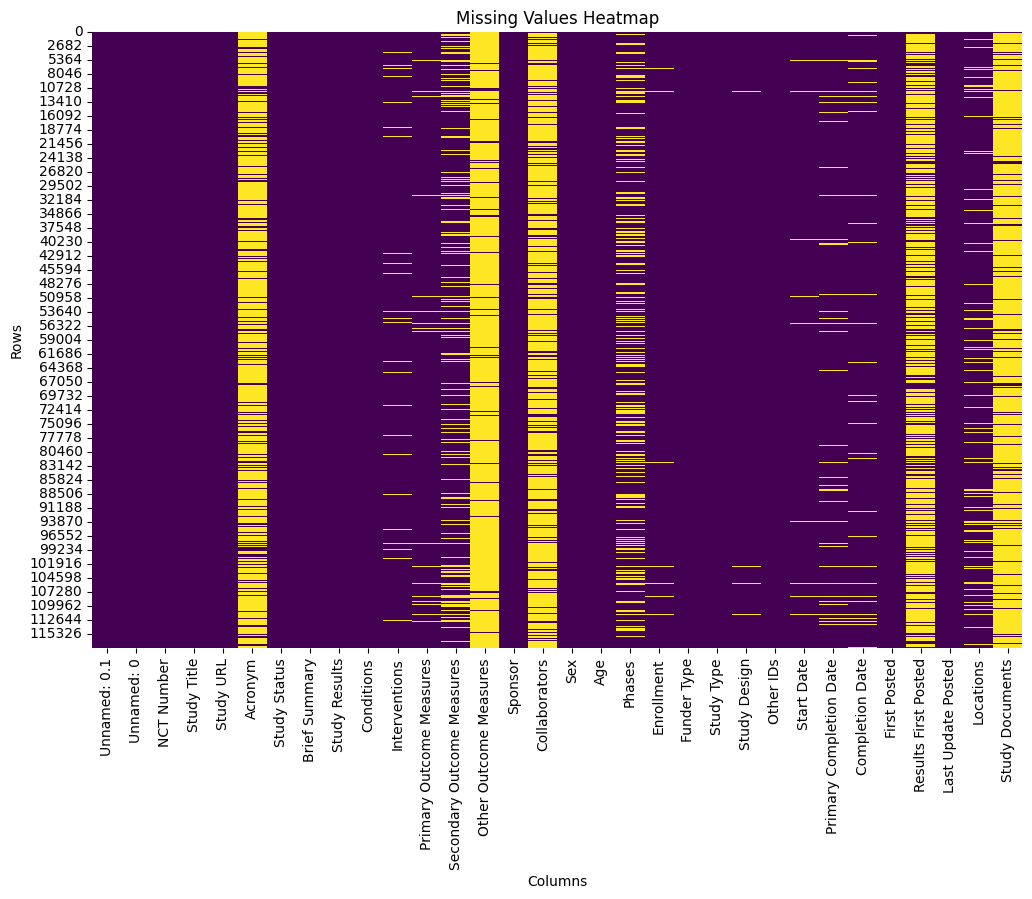

Columns with more than 20% missing values:
Acronym                       79.559247
Secondary Outcome Measures    21.003560
Other Outcome Measures        93.283607
Collaborators                 81.890151
Phases                        29.568571
Results First Posted          72.830141
Study Documents               89.101543
dtype: float64


In [8]:
import seaborn as sns
import os

import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Create a heatmap to visualize the patterns of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Create directory if it doesn't exist
if not os.path.exists('data cleaning images'):
    os.makedirs('data cleaning images')

# Save the heatmap
plt.savefig('data cleaning images/missing_values_heatmap.png')
plt.show()

# Identify columns with high missingness rates
high_missingness = missing_percentage[missing_percentage > 20]
print("Columns with more than 20% missing values:")
print(high_missingness)

# Combining Columns

In [9]:
import numpy as np

def combine_columns(dataframe, column1, column2):
    # Create a new column combining the two, but keeping rows as NaN if both values are NaN
    dataframe['Secondary Measures'] = dataframe.apply(
        lambda row: np.nan if pd.isna(row[column1]) and pd.isna(row[column2])
        else f"{row[column1] or ''} {row[column2] or ''}".strip(),
        axis=1
    )
    return dataframe


In [11]:
combine_columns(df, 'Secondary Outcome Measures', 'Other Outcome Measures')

,Unnamed: 0.1,Unnamed: 0,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,Secondary Measures
0,0,1,NCT03302091,A Study in People With Normal Kidney Function ...,https://clinicaltrials.gov/study/NCT03302091,NaN,COMPLETED,The primary objective of the current study is ...,YES,Renal Insufficiency|Healthy,...,1386-0002|2017-002180-18,2017-10-17,2018-08-16,2018-08-16,2017-10-04,2021-06-04,2021-06-04,"CRS Clinical Research Services Kiel GmbH, Kiel...","Study Protocol, https://cdn.clinicaltrials.gov...",Area Under the Concentration-time Curve of BI ...
1,1,2,NCT01948791,16w Interventional Study on Titration and Dose...,https://clinicaltrials.gov/study/NCT01948791,INSTINCT,COMPLETED,To investigate the efficacy of Exelon capsule ...,YES,Alzheimer's Disease,...,CENA713BCN05,2014-08,2015-09,2015-09,2013-09-24,2017-02-13,2017-02-13,"Novartis Investigative Site, Beijing, 100053, ...",NaN,Change From Baseline in the Alzheimer's Diseas...
2,2,5,NCT04621591,Case Series With Saneso 360° Gastroscope,https://clinicaltrials.gov/study/NCT04621591,NaN,COMPLETED,To confirm the procedural performance of the S...,NO,EGD Procedure,...,SAN360UGICL,2020-08-01,2020-08-30,2020-09-09,2020-11-09,NaN,2020-11-10,"Valley Endoscopy Center, Saint Clairsville, Oh...",NaN,Endoscopist qualitative rating of the Saneso 3...
3,3,6,NCT03130491,European Study Evaluating the EMBLOK Embolic P...,https://clinicaltrials.gov/study/NCT03130491,NaN,COMPLETED,The primary objective is to evaluate the perfo...,NO,Aortic Valve Disease,...,CLP002-2016,2017-03-08,2021-11-01,2022-01-28,2017-04-26,NaN,2024-03-05,"Hospital San Donato, Milan, Milano, 20097, Ita...",NaN,"Safety Endpoint (Rate of MACCE), Rate of MACCE..."
4,4,8,NCT01580891,Evaluate the Clinical Equivalence of Two Nafti...,https://clinicaltrials.gov/study/NCT01580891,NaN,COMPLETED,The objective of this study is to evaluate the...,NO,Tinea Pedis,...,NTFC 1105.0,2012-05,2013-03,2013-07,2012-04-19,NaN,2014-05-06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117975,117975,150114,NCT00706654,Intramuscular Depot Formulation of Aripiprazol...,https://clinicaltrials.gov/study/NCT00706654,ASPIRE,COMPLETED,The purpose of the this trial is to evaluate t...,YES,Schizophrenia,...,31-07-247,2008-09,2012-08,2012-08,2008-06-27,2013-08-14,2013-08-14,"Cerritos, California, 90703, United States|Esc...",NaN,Time to Exacerbation of Psychotic Symptoms/Imp...
117976,117976,150117,NCT05098054,A Study of Soticlestat in Adults With Liver Fa...,https://clinicaltrials.gov/study/NCT05098054,NaN,COMPLETED,The main aim is to check the effect of a singl...,YES,Hepatic Impairment|Healthy Volunteers,...,TAK-935-1010|2021-006373-29,2021-10-29,2022-05-31,2022-06-07,2021-10-28,2024-02-02,2024-02-02,"Velocity, Edgewater, Florida, 32132, United St...","Study Protocol, https://cdn.clinicaltrials.gov...",Number of Participants Reporting One or More T...
117977,117977,150119,NCT06352554,Susceptibility Testing In Neisseria Gonorrhoea...,https://clinicaltrials.gov/study/NCT06352554,STING,NOT_YET_RECRUITING,This study aims to validate a novel antibiotic...,NO,Diagnosis|Gonorrhea|Resistance Bacterial,...,2023/ETH02474:STING|224842/Z/21/Z|75A50122C00028,2024-04-08,2024-12-30,2025-01-30,2024-04-08,NaN,2024-04-09,NaN,NaN,To study the performance of the InSignia assay...
117978,117978,150120,NCT00710554,A Study of Sativex® for Pain Relief of Periphe...,https://clinicaltrials.gov/study/NCT00710554,NaN,COMPLETED,The purpose of this study is to evaluate the e...,YES,Pain|Peripheral Neuropathy,...,GWCL0405,2005-08,2006-10,2006-10,2008-07-04,2012-09-14,2023-05-03,"Pain Clinic Office, Gartnavel General Hospital...",NaN,Change From Baseline in Neuropathic Pain Scale...


In [23]:
# df[['Secondary Outcome Measures','Other Outcome Measures','Secondary Measures']]

In [29]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0','Study URL','Acronym','Study Results','Sponsor','Collaborators','Enrollment','Funder Type','Other IDs','Start Date','Primary Completion Date','Completion Date','First Posted','Results First Posted','Last Update Posted','Locations','Study Documents'],inplace=True)

In [30]:
df.drop(columns=['Secondary Outcome Measures','Other Outcome Measures'],inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117980 entries, 0 to 117979
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   NCT Number                117980 non-null  object
 1   Study Title               117980 non-null  object
 2   Study Status              117980 non-null  object
 3   Brief Summary             117980 non-null  object
 4   Conditions                117950 non-null  object
 5   Interventions             112324 non-null  object
 6   Primary Outcome Measures  114903 non-null  object
 7   Sex                       117838 non-null  object
 8   Age                       117980 non-null  object
 9   Phases                    83095 non-null   object
 10  Study Type                117980 non-null  object
 11  Study Design              117328 non-null  object
 12  Secondary Measures        93984 non-null   object
dtypes: object(13)
memory usage: 11.7+ MB


In [32]:
df.isna().sum()

NCT Number                      0
Study Title                     0
Study Status                    0
Brief Summary                   0
Conditions                     30
Interventions                5656
Primary Outcome Measures     3077
Sex                           142
Age                             0
Phases                      34885
Study Type                      0
Study Design                  652
Secondary Measures          23996
dtype: int64

Unnamed: 0.1                   0.000000
Unnamed: 0                     0.000000
NCT Number                     0.000000
Study Title                    0.000000
Study URL                      0.000000
Acronym                       79.559247
Study Status                   0.000000
Brief Summary                  0.000000
Study Results                  0.000000
Conditions                     0.025428
Interventions                  4.794033
Primary Outcome Measures       2.608069
Secondary Outcome Measures    21.003560
Other Outcome Measures        93.283607
Sponsor                        0.000000
Collaborators                 81.890151
Sex                            0.120359
Age                            0.000000
Phases                        29.568571
Enrollment                     1.553653
Funder Type                    0.000000
Study Type                     0.000000
Study Design                   0.552636
Other IDs                      0.002543
Start Date                     1.473979


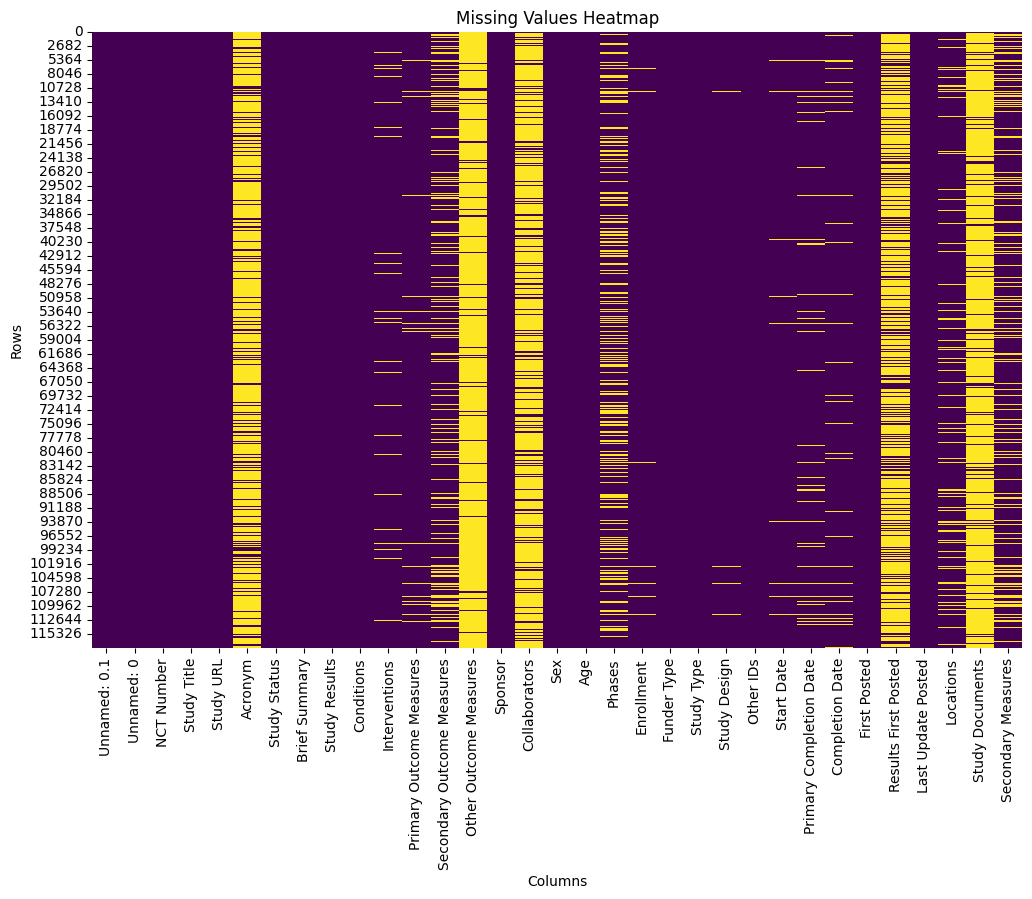

Columns with more than 20% missing values:
Acronym                       79.559247
Secondary Outcome Measures    21.003560
Other Outcome Measures        93.283607
Collaborators                 81.890151
Phases                        29.568571
Results First Posted          72.830141
Study Documents               89.101543
Secondary Measures            20.339041
dtype: float64


In [12]:
import seaborn as sns
import os

import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Create a heatmap to visualize the patterns of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Create directory if it doesn't exist
if not os.path.exists('data cleaning images'):
    os.makedirs('data cleaning images')

# Save the heatmap
plt.savefig('data cleaning images/missing_values_heatmap.png')
plt.show()

# Identify columns with high missingness rates
high_missingness = missing_percentage[missing_percentage > 20]
print("Columns with more than 20% missing values:")
print(high_missingness)